In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [5]:
m=pd.read_csv('C:\\Users\\Admin\\Desktop\\data analyst\\datasets\\bank-full.csv',sep=';')
m.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
m['conversion']=m['y'].apply(lambda x:1 if x =='yes' else 0)
m.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,conversion
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0


In [7]:
m.describe()

,age,balance,day,duration,campaign,pdays,previous,conversion
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,0.116985
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


In [8]:
m['conversion'].sum()

5289

In [10]:
m.shape[0]

45211

In [13]:
conversions_by_age = m.groupby(
by='age'
)['conversion'].sum() / m.groupby(
by='age'
)['conversion'].count() * 100.0

In [15]:
conversions_by_age

age
18     58.333333
19     31.428571
20     30.000000
21     27.848101
22     31.007752
         ...    
90    100.000000
92    100.000000
93    100.000000
94      0.000000
95     50.000000
Name: conversion, Length: 77, dtype: float64

In [27]:
conversion_by_age2=m[['conversion','age']]

In [28]:
conversion_by_age2

,conversion,age
0,0,58
1,0,44
2,0,33
3,0,47
4,0,33
...,...,...
45206,1,51
45207,1,71
45208,1,72
45209,0,57


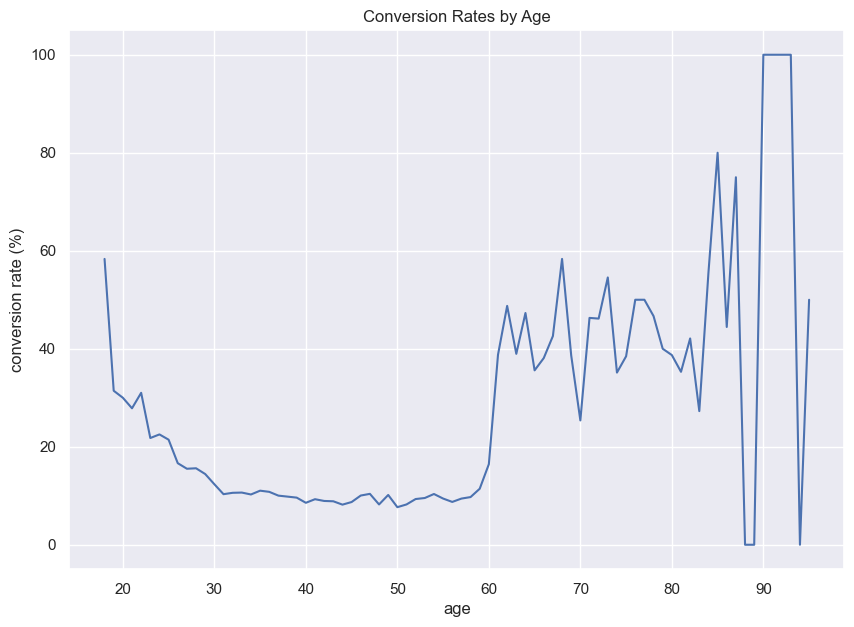

In [29]:
ax = conversions_by_age.plot(
grid=True,
figsize=(10, 7),
title='Conversion Rates by Age'
)
ax.set_xlabel('age')
ax.set_ylabel('conversion rate (%)')
plt.show()

In [33]:
m['age_group'] = m['age'].apply(
lambda x: '[18, 30)' if x < 30 else '[30, 40)' if x < 40 \
else '[40, 50)' if x < 50 else '[50, 60)' if x < 60 \
else '[60, 70)' if x < 70 else '70+'
)

In [34]:
conversions_by_age_group = m.groupby(
by='age_group'
)['conversion'].sum() / m.groupby(
by='age_group'
)['conversion'].count() * 100.0

In [35]:
conversions_by_age_group

age_group
70+         42.418773
[18, 30)    17.599090
[30, 40)    10.575488
[40, 50)     9.120549
[50, 60)     9.334126
[60, 70)    29.674797
Name: conversion, dtype: float64

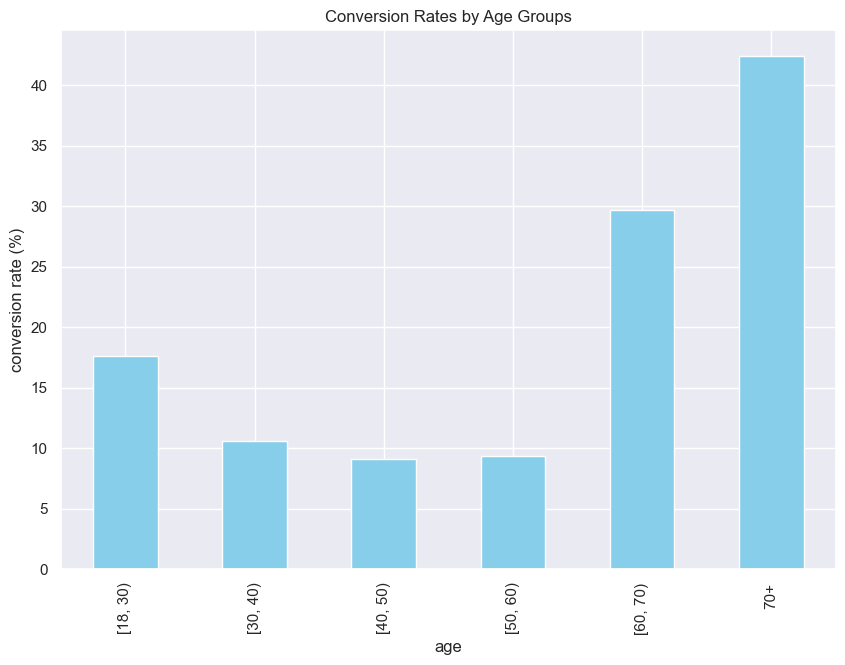

In [37]:
ax = conversions_by_age_group.loc[
['[18, 30)', '[30, 40)', '[40, 50)', '[50, 60)', '[60, 70)', '70+']
].plot(
kind='bar',
color='skyblue',
grid=True,
figsize=(10, 7),
title='Conversion Rates by Age Groups'
)
ax.set_xlabel('age')
ax.set_ylabel('conversion rate (%)')
              
plt.show()

In [58]:
conversion_by_marital_status=pd.pivot_table(m, values='y', index='marital', columns='conversion', aggfunc=len)

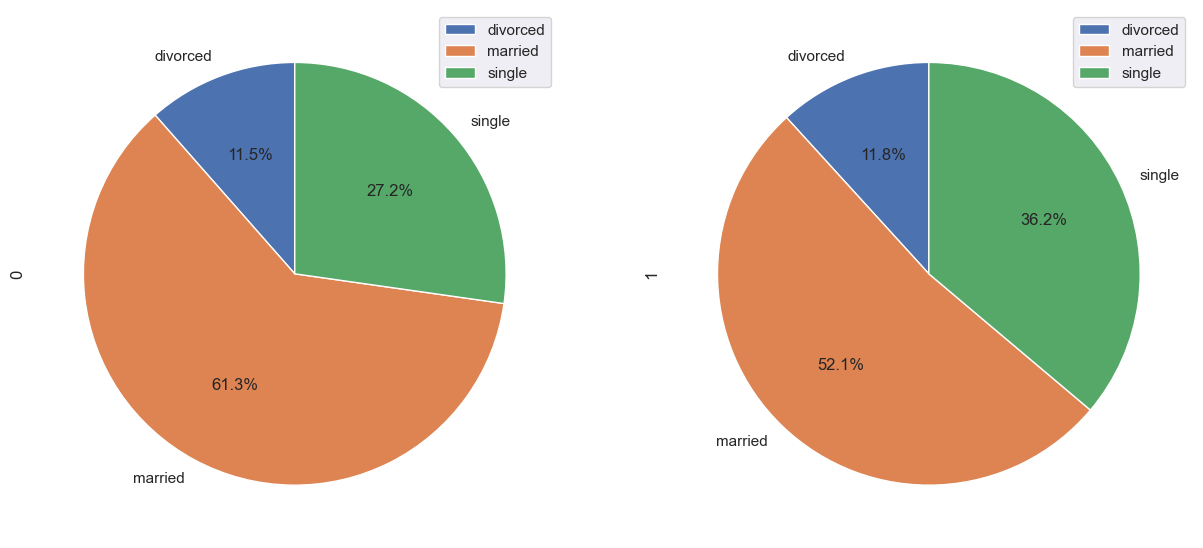

In [59]:
conversion_by_marital_status.plot(
kind='pie',
figsize=(15, 7),
startangle=90,
subplots=True,
autopct=lambda x: '%0.1f%%' % x
)
plt.show()

In [67]:
age_marital_df = m.groupby(['age_group', 'marital'])
m.conversion.sum.unstack('marital').fillna(0)
age_marital_df = age_marital_df.divide(
m.groupby(
by='age_group'
)['conversion'].count(),
axis=0
)

AttributeError: 'function' object has no attribute 'unstack'

['conversion']